# Example: User Interaction With The Plot Window

The class |ClickEventHandler| allows for additional interaction with the plot
on top of that provided by ``matplotlib``.

Note: This may not work in Jupyter Notebook

To use the class, first import and process the data before:

In [1]:
import pathlib

import matplotlib.pyplot as plt

from pyms.GCMS.IO.JCAMP import JCAMP_reader
from pyms.IntensityMatrix import build_intensity_matrix
from pyms.Display import plot_ic, plot_peaks
from pyms.Noise.SavitzkyGolay import savitzky_golay
from pyms.TopHat import tophat
from pyms.BillerBiemann import BillerBiemann, rel_threshold, num_ions_threshold

In [2]:
data_directory = pathlib.Path(".").resolve().parent.parent / "pyms-data"
# Change this if the data files are stored in a different location

output_directory = pathlib.Path(".").resolve() / "output"

In [3]:
jcamp_file = data_directory / "gc01_0812_066.jdx"
data = JCAMP_reader(jcamp_file)
data.trim("500s", "2000s")
tic = data.tic
im = build_intensity_matrix(data)

 -> Reading JCAMP file '/home/vagrant/PyMassSpec/pyms-data/gc01_0812_066.jdx'
Trimming data to between 520 and 4517 scans


In [4]:
n_scan, n_mz = im.size

for ii in range(n_mz):
	ic = im.get_ic_at_index(ii)
	ic_smooth = savitzky_golay(ic)
	ic_bc = tophat(ic_smooth, struct="1.5m")
	im.set_ic_at_index(ii, ic_bc)

In [5]:
peak_list = BillerBiemann(im, points=9, scans=2)
pl = rel_threshold(peak_list, percent=2)
new_peak_list = num_ions_threshold(pl, n=3, cutoff=10000)

print("Number of filtered peaks: ", len(new_peak_list))


Number of filtered peaks:  72


Creating the plot proceeds much as before, except that 
|ClickEventHandler(peak_list=new_peak_list)| must be called before ``plt.show()``.

You should also assign this to a variable to prevent it being garbage collected.

301683.9047619046
369284.3333333332
91942.14285714283
233347.7619047618
142839.52380952376
375386.3333333332
2988934.999999999
5248592.76190476
2082994.3333333323
166091.09523809515
524115.66666666645
3484375.571428571
169028.619047619
177873.28571428562
222694.61904761897
194526.42857142855
2909316.380952379
3539133.190476189
79805.33333333333
412492.33333333314
4133987.380952379
80747.52380952376
4399813.666666665
3245759.238095236
1379215.7619047614
537112.4285714284
2037894.142857142
1674621.7142857139
5838757.047619046
6137090.809523807
372022.4761904761
101052.2857142857
120870.19047619042
2989261.8571428563
227927.1428571428
343972.38095238083
3433341.4761904753
243866.619047619
4406332.476190476
1520631.7619047614
143266.09523809518
1852775.7142857139
2703031.6666666656
5272497.5238095205
128960.33333333328
4321301.952380951
176948.57142857136
793323.7619047615
805459.3333333329
3745138.476190474
3245251.619047618
810290.9523809521
866114.7619047617
236420.52380952373
2821752.2

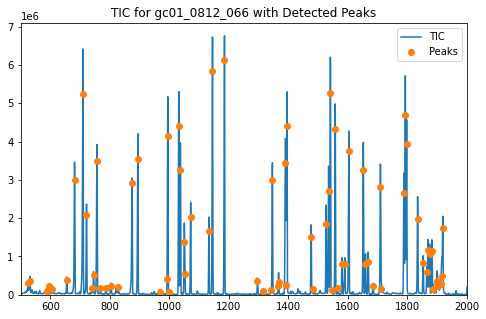

In [6]:
from pyms.Display import ClickEventHandler

%matplotlib inline
# Change to `notebook` for an interactive view

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Plot the TIC
plot_ic(ax, tic, label="TIC")

# Plot the peaks
plot_peaks(ax, new_peak_list)

# Set the title
ax.set_title('TIC for gc01_0812_066 with Detected Peaks')

# Set up the ClickEventHandler
handler = ClickEventHandler(new_peak_list)

# Add the legend
plt.legend()

plt.show()

Clicking on a Peak causes a list of the 5 highest intensity ions
at that Peak to be written to the terminal in order. The output should look
similar to this:


	RT: 1031.823
	Mass	 Intensity
	158.0	 2206317.857142857
	73.0	 628007.1428571426
	218.0	 492717.04761904746
	159.0	 316150.4285714285
	147.0	 196663.95238095228


If there is no Peak close to the point on the chart that was clicked, the
the following will be shown in the terminal:

	No Peak at this point


The |ClickEventHandler| class can be configured with a different tolerance, in
seconds, when clicking on a Peak, and to display a different number of top n
ions when a Peak is clicked.

In addition, clicking the right mouse button on a Peak displays the mass
spectrum at the peak in a new window.